In [7]:
# Linear regression!
# ls223qx@student.lnu.se Love Samuelsson

%matplotlib inline

import numpy as np
import math
from numpy import genfromtxt
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
# Exercise A

data = genfromtxt('girls_height.csv',delimiter='\t') # Who makes a CSV with a tab as a delimiter????

X_train = data[:,:2]
Y_train = data[:,2]

Text(0, 0.5, 'Girls height')

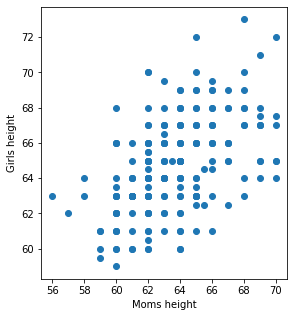

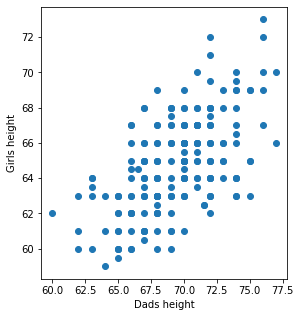

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(data[:,1], data[:,0])
plt.xlabel("Moms height")
plt.ylabel("Girls height")

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(data[:,2], data[:,0])
plt.xlabel("Dads height")
plt.ylabel("Girls height")


In [12]:
augmentedMatrix = create_extended(data, 0)
beta = normalEq(augmentedMatrix, data[:,0])
print(beta)
print(np.shape(beta))

cost = calculateCost(augmentedMatrix, data[:,0], beta)

predict = predictWithBetas(beta, (65, 70))
print(predict)

[18.54725207  0.30350558  0.38785559]
(3,)
4.0677431722098305
65.42500587970036


Text(0, 0.5, 'Girls height')

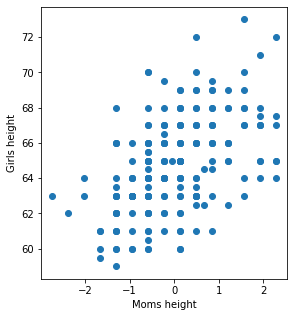

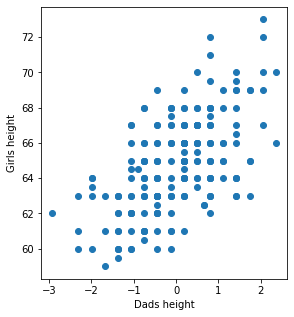

In [186]:
normalizedFeatures, meanAndDeviation = generateNormalized(data, 0)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(normalizedFeatures[:,0], data[:,0])
plt.xlabel("Moms height")
plt.ylabel("Girls height")

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(normalizedFeatures[:,1], data[:,0])
plt.xlabel("Dads height")
plt.ylabel("Girls height")


In [193]:
normalizedWithOnes = create_extended(normalizedFeatures)
beta = normalEq(normalizedWithOnes, data[:,0])

sample = (65,70)
normalizedSample = normalizeSample(meanAndDeviation, sample)
print(normalizedSample)
predict = predictWithBetas(beta, normalizedSample)
print(predict)

[0.49090986 0.18256709]
65.42500587970815


In [3]:
def create_extended(arr,labelPos=None):
    shapeTuple = arr.shape # of shape (x,y,...z)
    ones = np.ones((shapeTuple[0],1), dtype=int) # Creates a colum with same size as the input array
    
    res = 0
    if labelPos is not None:
        arrModified = np.delete(arr,labelPos, 1) # Returns matrix with column deleted
        res = np.hstack((ones, arrModified))
    else:
        res = np.hstack((ones, arr)) # Column stacks the matrixes
    return res

def normalEq(arr, yLabel):
        # Numpy way of performing the normal equation in matrix form
    betas = np.linalg.inv(arr.T.dot(arr)).dot(arr.T.dot(yLabel))
    return betas

def predictWithBetas(betas, features):
    # Predicts using available beta values and features
    # Generalized for ints, floats
    value = 0
    value += betas[0]
    for count, feat in enumerate(features):
        value += betas[count+1]*feat
    return value

In [4]:
def generateNormalized(data,ypos):
    features = np.delete(data,ypos, 1) # Deletes labels from array
    
    # Computes mean and standard deviation
    mean = features.mean(axis=0) 
    standardDeviation = features.std(axis=0)
    
    # Constructs the first "subtraction matrix" for the first part of the equation X.i = (X.i - u.i) / sigma.i
    subtractionArray = np.matrix('')
    for idx, means in enumerate(mean): # Inefficient maybe? I can think of a way to do this with broadcasting instead...
        if idx == 0:
            subtractionArray = np.full((features.shape[0],1),means)
        else:
            subtractionArray = np.append(subtractionArray, np.full((features.shape[0],1),means), axis = 1)
            
    subtracted = features - subtractionArray # Subtracts
    complete = subtracted / standardDeviation # Immediately 
    return complete, (mean, standardDeviation)
    
def normalizeSample(meanAndDeviation, sample):
    mean = meanAndDeviation[0]
    deviation = meanAndDeviation[1]
    
    np.array(sample)
    
    sample = sample - mean
    sample = sample / deviation
    return sample

In [11]:
def calculateCost(extArr, yLabels, betas):
    mid = (extArr.dot(betas) - yLabels)
    cost = (mid).T.dot(mid)
    cost = (1/np.shape(extArr)[0])*cost
    print(cost)
    return cost